In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/processed/processed_data2.csv')


In [3]:
print(df.shape)
df.head()

(291, 35)


,gender,age,education,marital,income,loan,friend_no,friend_help,friend_interact,share_feel,...,thoughts_command,self_harm,thoughts_acted,thoughts_acted2,thoughts_time,voices,harming_others,suicide,suicidal_thoughts,therapy
0,Female,20-26,University,single,<10,no,none,maybe,0,idk,...,maybe,yes,yes,yes,night,yes,no,yes,no,no
1,Male,20-26,University,married,<10,no,3+,yes,1,yes,...,yes,no,yes,yes,night,no,no,no,no,no
2,Female,13-19,College,single,<10,no,1,yes,1,no,...,yes,no,yes,yes,Afternoon,no,no,no,no,yes
3,Female,13-19,College,single,<10,no,1,no,0,maybe,...,maybe,yes,yes,yes,night,no,no,yes,no,no
4,Female,20-26,University,single,<10,no,3+,yes,3,yes,...,yes,yes,yes,no,evening,yes,no,yes,yes,yes


In [4]:
#no null values remaining
[x for x in df.columns if df[x].isnull().sum()>0]

[]

In [5]:
df.columns

Index(['gender', 'age', 'education', 'marital', 'income', 'loan', 'friend_no',
       'friend_help', 'friend_interact', 'share_feel', 'have_someone',
       'lonely', 'bullied', 'family_support', 'compare_life', 'social_media',
       'hangout', 'home_time', 'religious', 'goal', 'suicidal',
       'sleep_disorder', 'mental_disorder', 'love_someone', 'die_someone',
       'thoughts_command', 'self_harm', 'thoughts_acted', 'thoughts_acted2',
       'thoughts_time', 'voices', 'harming_others', 'suicide',
       'suicidal_thoughts', 'therapy'],
      dtype='object')

In [6]:
df['mental_disorder'].value_counts()

depression      153
stress           49
anxiety          43
None             30
Panic attack     16
Name: mental_disorder, dtype: int64

In [7]:
from pycaret.classification import *

- setup(df, target = 'mental_disorder') : max = 64
- setup(df, target = 'mental_disorder',feature_selection = True) : max = 58




In [8]:
group_names = []

In [8]:
s = setup(df, target = 'mental_disorder')

,Description,Value
0,session_id,4230
1,Target,mental_disorder
2,Target Type,Multiclass
3,Label Encoded,"None: 0, Panic attack: 1, anxiety: 2, depression: 3, stress: 4"
4,Original Data,"(291, 35)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,34
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5371,0.5000,0.2000,0.2888,0.3756,0.0000,0.0000,0.0080
lightgbm,Light Gradient Boosting Machine,0.5369,0.7556,0.3168,0.4754,0.4976,0.2447,0.2532,0.0400
et,Extra Trees Classifier,0.5317,0.7637,0.2730,0.4456,0.4724,0.2014,0.2201,0.1010
rf,Random Forest Classifier,0.5314,0.7674,0.2860,0.4117,0.4584,0.1789,0.2001,0.1020
gbc,Gradient Boosting Classifier,0.5310,0.7363,0.3218,0.4853,0.4898,0.2240,0.2359,0.1740
ridge,Ridge Classifier,0.5169,0.0000,0.3293,0.5124,0.4968,0.2424,0.2521,0.0100
lr,Logistic Regression,0.5167,0.7281,0.3295,0.5109,0.4982,0.2413,0.2472,0.5960
knn,K Neighbors Classifier,0.5155,0.7214,0.3141,0.4563,0.4762,0.2310,0.2432,0.0180
catboost,CatBoost Classifier,0.5119,0.7688,0.2674,0.4114,0.4511,0.1711,0.1832,6.7700
svm,SVM - Linear Kernel,0.4869,0.0000,0.3136,0.4938,0.4728,0.2041,0.2145,0.0140


In [11]:
type(best)

sklearn.ensemble._forest.RandomForestClassifier

In [12]:
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=759, verbose=0,
                       warm_start=False)

### Light Gradient Boosting Machine

In [10]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4762,0.7749,0.2636,0.3605,0.4089,0.1538,0.1642
1,0.6190,0.8630,0.4318,0.5855,0.5862,0.3913,0.4030
2,0.5238,0.7966,0.2818,0.3750,0.4356,0.1700,0.1897
3,0.5000,0.7677,0.2933,0.4800,0.4875,0.2647,0.2687
4,0.6500,0.7728,0.4152,0.5929,0.6067,0.3939,0.4105
5,0.5000,0.7397,0.3273,0.4750,0.4857,0.2157,0.2165
6,0.5000,0.5966,0.3121,0.4800,0.4875,0.2126,0.2152
7,0.5500,0.6791,0.2818,0.4929,0.5067,0.2208,0.2300
8,0.5500,0.8036,0.3303,0.5208,0.5329,0.2941,0.2965


In [11]:
tuned_lightgbm = tune_model(lightgbm,choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.8127,0.3000,0.3509,0.4317,0.1711,0.2618
1,0.5714,0.8363,0.3000,0.3519,0.4355,0.2025,0.2703
2,0.6190,0.8296,0.4000,0.3836,0.4736,0.2911,0.3885
3,0.5500,0.7321,0.2667,0.3500,0.4275,0.2105,0.2572
4,0.6000,0.8640,0.3000,0.4184,0.4700,0.1534,0.2940
5,0.4500,0.6458,0.2939,0.4214,0.4300,0.1339,0.1414
6,0.5500,0.7290,0.2818,0.4235,0.4595,0.1220,0.1518
7,0.6000,0.7237,0.3000,0.4281,0.4981,0.2523,0.2894
8,0.7000,0.7464,0.4333,0.6533,0.6521,0.4570,0.4899


In [21]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4886,0.7214,0.3215,0.4160,0.4103,0.1449,0.1632


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,depression,0.2988
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None,0.2812
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression,0.6826
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression,0.7734
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,None,0.2940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression,0.6807
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression,0.7354
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,depression,0.3166
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,None,0.2906


In [20]:
# ensemble model
ensemble_lightgbm = ensemble_model(tuned_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.8068,0.3000,0.3509,0.4317,0.1711,0.2618
1,0.5714,0.8792,0.3000,0.3833,0.4352,0.1370,0.2776
2,0.5714,0.8166,0.3000,0.3509,0.4317,0.1711,0.2618
3,0.5000,0.7704,0.2000,0.3125,0.3846,0.1304,0.1571
4,0.6500,0.8701,0.3667,0.5861,0.5589,0.2893,0.4141
5,0.5500,0.6520,0.3303,0.4675,0.4903,0.1855,0.2039
6,0.5500,0.6748,0.2818,0.4235,0.4595,0.1220,0.1518
7,0.6500,0.7101,0.4000,0.4781,0.5481,0.3458,0.3966
8,0.7000,0.7712,0.4333,0.5781,0.6148,0.4366,0.5021


In [17]:
#this is the best from here
predict_model(ensemble_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5341,0.7450,0.3242,0.4255,0.4301,0.1715,0.2166


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,depression,0.2623
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None,0.2625
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression,0.5783
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression,0.7287
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,depression,0.3282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression,0.5654
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression,0.6190
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,depression,0.3561
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression,0.3064


### Dummy Classifier	

In [14]:
dummy = create_model("dummy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.5000,0.2000,0.2744,0.3601,0.0000,0.0000
1,0.5238,0.5000,0.2000,0.2744,0.3601,0.0000,0.0000
2,0.5238,0.5000,0.2000,0.2744,0.3601,0.0000,0.0000
3,0.5000,0.5000,0.2000,0.2500,0.3333,0.0000,0.0000
4,0.5500,0.5000,0.2000,0.3025,0.3903,0.0000,0.0000
5,0.5500,0.5000,0.2000,0.3025,0.3903,0.0000,0.0000
6,0.5500,0.5000,0.2000,0.3025,0.3903,0.0000,0.0000
7,0.5500,0.5000,0.2000,0.3025,0.3903,0.0000,0.0000
8,0.5500,0.5000,0.2000,0.3025,0.3903,0.0000,0.0000


### Extra trees classifier

In [25]:
et = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.8054,0.3136,0.5089,0.4571,0.1700,0.1941
1,0.5714,0.8958,0.3000,0.3866,0.4592,0.2254,0.2664
2,0.5714,0.8332,0.2500,0.4342,0.4751,0.2190,0.2567
3,0.5500,0.7580,0.2667,0.4542,0.4974,0.2969,0.3025
4,0.6500,0.8114,0.4152,0.5438,0.5741,0.3427,0.3941
5,0.4500,0.6795,0.2121,0.5150,0.4790,0.1698,0.1712
6,0.5000,0.6876,0.2636,0.4058,0.4458,0.1667,0.1725
7,0.4500,0.6313,0.2455,0.3885,0.4167,0.0756,0.0769
8,0.5000,0.7569,0.1818,0.3929,0.4400,0.1266,0.1329


In [28]:
tuned_et = tune_model(et,choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.8324,0.3818,0.4339,0.4724,0.2025,0.2654
1,0.5714,0.8354,0.3000,0.3985,0.4476,0.1637,0.2452
2,0.6190,0.8379,0.3500,0.4818,0.5227,0.3058,0.3609
3,0.5500,0.8018,0.2667,0.4083,0.4600,0.2340,0.2588
4,0.6000,0.8761,0.3000,0.4184,0.4700,0.1534,0.2940
5,0.5000,0.6881,0.1818,0.3929,0.4400,0.1342,0.1406
6,0.5500,0.6869,0.2818,0.4167,0.4731,0.1892,0.2062
7,0.6000,0.6590,0.3000,0.4781,0.5148,0.2488,0.2862
8,0.6000,0.7828,0.3000,0.4115,0.4881,0.2558,0.2970


In [32]:
predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5455,0.7622,0.3510,0.5962,0.4562,0.2065,0.2520


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,depression,0.3080
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None,0.4379
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression,0.5393
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression,0.7726
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,depression,0.3042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression,0.4154
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression,0.5300
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,depression,0.3802
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression,0.3914


In [33]:
ensemble_et = ensemble_model(tuned_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.8210,0.2818,0.3228,0.3993,0.1139,0.1520
1,0.5714,0.8682,0.3000,0.3833,0.4352,0.1370,0.2776
2,0.6190,0.8443,0.3500,0.4818,0.5227,0.3058,0.3609
3,0.5000,0.7745,0.2000,0.3125,0.3846,0.1228,0.1445
4,0.6500,0.8849,0.3667,0.5861,0.5589,0.2893,0.4141
5,0.6500,0.6740,0.3667,0.5531,0.5748,0.3427,0.3884
6,0.5000,0.6866,0.2636,0.4300,0.4474,0.0950,0.1044
7,0.5500,0.6782,0.2818,0.4667,0.4897,0.1855,0.2039
8,0.5000,0.7740,0.1818,0.3438,0.4074,0.0610,0.0702


In [34]:
predict_model(ensemble_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5455,0.7645,0.3333,0.6045,0.4587,0.2000,0.2478


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,depression,0.2938
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None,0.3829
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression,0.5097
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression,0.7703
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,depression,0.3108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression,0.3955
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression,0.5267
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,depression,0.3604
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression,0.3488


### CatBoost Classifier

In [35]:
catboost = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4762,0.8044,0.2636,0.3249,0.3844,0.0533,0.0630
1,0.6190,0.8777,0.4000,0.4871,0.5284,0.3360,0.3771
2,0.5238,0.8497,0.2000,0.3389,0.4116,0.1463,0.1756
3,0.5500,0.7853,0.3133,0.4875,0.5119,0.2969,0.3025
4,0.5000,0.7637,0.2303,0.3911,0.4389,0.1304,0.1375
5,0.4500,0.7406,0.2939,0.4400,0.4375,0.1667,0.1712
6,0.5000,0.6244,0.2636,0.3800,0.4308,0.0991,0.1067
7,0.5000,0.6933,0.2636,0.4036,0.4460,0.1304,0.1360
8,0.4500,0.7315,0.1636,0.4125,0.4304,0.1020,0.1039


In [38]:
grid = {'max_depth': [3,4,5],'n_estimators':[10,100, 200, 300]}
tuned_catboost = tune_model(catboost,custom_grid=grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4762,0.8338,0.2636,0.3185,0.3810,0.0870,0.0993
1,0.4762,0.8254,0.2636,0.3844,0.4248,0.1413,0.1473
2,0.6190,0.8568,0.3500,0.5294,0.5385,0.3058,0.3584
3,0.5500,0.7379,0.3133,0.4875,0.5119,0.2969,0.3025
4,0.6000,0.7954,0.3485,0.5167,0.5397,0.2825,0.3075
5,0.4500,0.7229,0.2606,0.5153,0.4779,0.1941,0.1966
6,0.6000,0.6081,0.3970,0.5536,0.5660,0.3043,0.3157
7,0.5000,0.7140,0.2636,0.4808,0.4792,0.1561,0.1596
8,0.6000,0.7851,0.4485,0.5179,0.5500,0.3074,0.3186


In [39]:
ensemble_catboost = ensemble_model(tuned_catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.8310,0.2818,0.3399,0.4122,0.1393,0.1670
1,0.5714,0.8143,0.3000,0.4342,0.4751,0.2254,0.2664
2,0.6190,0.8471,0.3500,0.4818,0.5227,0.3058,0.3609
3,0.5500,0.7659,0.3133,0.4750,0.5091,0.2969,0.3012
4,0.6000,0.7774,0.3485,0.5304,0.5495,0.3074,0.3254
5,0.5000,0.7497,0.3121,0.4800,0.4875,0.2126,0.2152
6,0.5000,0.6606,0.2636,0.4308,0.4625,0.1597,0.1639
7,0.5000,0.6878,0.3121,0.4467,0.4701,0.1870,0.1912
8,0.5500,0.7618,0.3818,0.4481,0.4917,0.2562,0.2624


In [40]:
predict_model(ensemble_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.4659,0.7492,0.3061,0.4888,0.4474,0.1933,0.2001


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,None,0.3125
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None,0.7812
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression,0.4985
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression,0.9431
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,None,0.4394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression,0.4287
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression,0.8338
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,depression,0.3648
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression,0.5028


### Ridge


In [49]:
ridge = create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.0000,0.3955,0.6571,0.5372,0.3160,0.3311
1,0.4762,0.0000,0.2636,0.3844,0.4248,0.1348,0.1395
2,0.6190,0.0000,0.3500,0.5270,0.5543,0.3538,0.3769
3,0.4500,0.0000,0.2267,0.3936,0.4185,0.1698,0.1733
4,0.6000,0.0000,0.3485,0.6429,0.5817,0.3249,0.3529
5,0.3500,0.0000,0.2242,0.3938,0.3561,0.0813,0.0850
6,0.6000,0.0000,0.3970,0.6375,0.5888,0.3548,0.3627
7,0.4500,0.0000,0.2455,0.4167,0.4326,0.1129,0.1144
8,0.6000,0.0000,0.5303,0.5625,0.5738,0.3600,0.3677


In [50]:
#this is the best from here 
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.0000,0.3000,0.3833,0.4352,0.1370,0.2776
1,0.5238,0.0000,0.2000,0.2744,0.3601,0.0000,0.0000
2,0.5238,0.0000,0.2000,0.2744,0.3601,0.0000,0.0000
3,0.5500,0.0000,0.2667,0.3441,0.4204,0.1855,0.2461
4,0.5500,0.0000,0.2000,0.3025,0.3903,0.0000,0.0000
5,0.5500,0.0000,0.2000,0.3361,0.4172,0.0816,0.1162
6,0.5000,0.0000,0.1818,0.2895,0.3667,-0.0638,-0.1217
7,0.5500,0.0000,0.2000,0.3361,0.4172,0.0816,0.1179
8,0.5500,0.0000,0.2000,0.3025,0.3903,0.0000,0.0000


In [52]:
predict_model(tuned_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5227,0,0.2444,0.3611,0.3783,0.0676,0.1650


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_evening,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,depression
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,depression
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression


In [51]:
ensemble_ridge = ensemble_model(tuned_ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.5223,0.2000,0.2744,0.3601,0.0000,0.0000
1,0.5238,0.5706,0.2000,0.2744,0.3601,0.0000,0.0000
2,0.5238,0.6597,0.2000,0.2744,0.3601,0.0000,0.0000
3,0.5500,0.6682,0.2667,0.3691,0.4304,0.1855,0.2415
4,0.6000,0.6051,0.3000,0.4184,0.4700,0.1534,0.2940
5,0.5500,0.5397,0.2000,0.3361,0.4172,0.0816,0.1179
6,0.5000,0.5616,0.1818,0.2895,0.3667,-0.0638,-0.1217
7,0.5500,0.5608,0.2000,0.3361,0.4172,0.0816,0.1179
8,0.5500,0.7890,0.2000,0.3025,0.3903,0.0000,0.0000


In [53]:
predict_model(ensemble_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5114,0.5515,0.2399,0.3613,0.3758,0.0615,0.1190


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,depression,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None,0.7
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,depression,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression,1.0
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression,1.0
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,depression,1.0
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression,1.0


### Logistic Regression

In [56]:
lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.6944,0.3136,0.6071,0.5179,0.2734,0.2814
1,0.4762,0.7216,0.2636,0.3844,0.4248,0.1348,0.1395
2,0.6667,0.8103,0.4500,0.6655,0.6133,0.4576,0.4785
3,0.5500,0.6865,0.3133,0.4800,0.5066,0.2969,0.3065
4,0.5000,0.7964,0.3121,0.5167,0.4993,0.1968,0.1985
5,0.4000,0.6990,0.2424,0.4167,0.3967,0.1144,0.1175
6,0.5500,0.6493,0.3788,0.5608,0.5519,0.3156,0.3181
7,0.4500,0.6964,0.2455,0.4667,0.4493,0.1093,0.1118
8,0.5500,0.8082,0.5121,0.5733,0.5590,0.3208,0.3221


In [57]:
tuned_lr = tune_model(lr)
predict_model(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.7226,0.3136,0.6024,0.5133,0.2734,0.2835
1,0.4762,0.7409,0.2636,0.3844,0.4248,0.1348,0.1395
2,0.6667,0.8235,0.4500,0.6655,0.6133,0.4576,0.4785
3,0.5500,0.6945,0.3133,0.4625,0.5019,0.2969,0.3039
4,0.5500,0.8157,0.3303,0.5308,0.5292,0.2531,0.2594
5,0.4000,0.6925,0.2424,0.4167,0.3967,0.1078,0.1111
6,0.6000,0.6745,0.3970,0.5958,0.5929,0.3725,0.3755
7,0.4500,0.6937,0.2455,0.4667,0.4493,0.1093,0.1118
8,0.6000,0.8196,0.5303,0.6083,0.6000,0.3774,0.3789


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.4773,0.7599,0.3592,0.4627,0.4607,0.2197,0.2239


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,None,0.3148
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None,0.9338
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,anxiety,0.4622
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression,0.9456
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,depression,0.4440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression,0.5580
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression,0.7234
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,stress,0.4031
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression,0.6017


In [58]:
#this is better from here
ensemble_lr = ensemble_model(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.8046,0.1636,0.3143,0.3626,0.0455,0.0499
1,0.4762,0.7887,0.2636,0.3844,0.4248,0.1413,0.1473
2,0.6190,0.8145,0.3500,0.5030,0.5379,0.3307,0.3661
3,0.5500,0.7315,0.3133,0.4625,0.5019,0.2969,0.3039
4,0.6000,0.8015,0.3485,0.5167,0.5397,0.2825,0.3075
5,0.5000,0.7276,0.4091,0.6000,0.5186,0.2780,0.2973
6,0.6000,0.6666,0.3970,0.5708,0.5804,0.3522,0.3555
7,0.5500,0.6654,0.3303,0.5108,0.5167,0.2405,0.2494
8,0.5500,0.8090,0.5121,0.5250,0.5333,0.3023,0.3035


In [59]:
predict_model(ensemble_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5114,0.7714,0.3883,0.5112,0.4935,0.2567,0.2651


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,stress,0.3341
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None,0.8327
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression,0.4405
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression,0.9389
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,depression,0.4341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression,0.5511
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression,0.6694
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,anxiety,0.3856
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression,0.4402


In [45]:
# blend models
blender = blend_models([ensemble_lightgbm,tuned_et])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.8252,0.2818,0.3228,0.3993,0.1139,0.1520
1,0.5714,0.8711,0.3000,0.3833,0.4352,0.1370,0.2776
2,0.5714,0.8446,0.3000,0.3677,0.4450,0.1957,0.2544
3,0.5500,0.7847,0.2667,0.3875,0.4446,0.2105,0.2478
4,0.6500,0.8940,0.3667,0.5861,0.5589,0.2893,0.4141
5,0.6000,0.6663,0.3485,0.5304,0.5495,0.3013,0.3162
6,0.5500,0.6949,0.2818,0.3938,0.4574,0.1589,0.1822
7,0.6000,0.6785,0.3000,0.4781,0.5148,0.2488,0.2862
8,0.7000,0.7683,0.4333,0.6059,0.6188,0.4146,0.5160


In [46]:
predict_model(blender)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5341,0.7596,0.3242,0.4635,0.4280,0.1673,0.2170


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,depression,0.2852
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None,0.3502
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression,0.5588
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression,0.7506
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,depression,0.3162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression,0.4904
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression,0.5745
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,depression,0.3681
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression,0.3489


In [54]:

blender2 = blend_models([ensemble_lightgbm,tuned_et,tuned_ridge])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.0000,0.3000,0.3509,0.4317,0.1711,0.2618
1,0.5714,0.0000,0.3000,0.3833,0.4352,0.1370,0.2776
2,0.5714,0.0000,0.3000,0.3509,0.4317,0.1711,0.2618
3,0.5500,0.0000,0.2667,0.3691,0.4304,0.1855,0.2415
4,0.6000,0.0000,0.3000,0.4184,0.4700,0.1534,0.2940
5,0.6000,0.0000,0.3000,0.4059,0.4821,0.2233,0.2792
6,0.5500,0.0000,0.2818,0.4235,0.4595,0.1220,0.1518
7,0.6500,0.0000,0.4000,0.4781,0.5481,0.3458,0.3966
8,0.6000,0.0000,0.3000,0.3892,0.4721,0.2271,0.2909


In [55]:
predict_model(blender2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5455,0,0.3288,0.5915,0.4345,0.1835,0.2451


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_evening,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,depression
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,depression
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression


#### In terms of train accuracy : blender 1 > blender 2
#### In terms of test accuracy : blender 2 > blender 1

In [60]:
blender3 = blend_models([ensemble_lightgbm,tuned_et,tuned_ridge,ensemble_lr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.0000,0.2818,0.3228,0.3993,0.1139,0.1520
1,0.5714,0.0000,0.3000,0.3985,0.4476,0.1637,0.2452
2,0.6190,0.0000,0.3500,0.4818,0.5227,0.3058,0.3609
3,0.5500,0.0000,0.2667,0.3875,0.4446,0.2105,0.2478
4,0.6500,0.0000,0.3667,0.5861,0.5589,0.2893,0.4141
5,0.5500,0.0000,0.3303,0.4836,0.5002,0.2140,0.2295
6,0.5500,0.0000,0.2818,0.3938,0.4574,0.1589,0.1822
7,0.6000,0.0000,0.3000,0.4559,0.4988,0.2195,0.2732
8,0.6500,0.0000,0.3667,0.5559,0.5571,0.3204,0.4007


In [61]:
predict_model(blender3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5227,0,0.3374,0.4680,0.4295,0.1732,0.2077


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_evening,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_yes,suicidal_thoughts_no,therapy_no,mental_disorder,Label
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,stress,depression
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,None,None
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,stress,depression
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,depression,depression
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,depression,depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,stress,depression
84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,depression,depression
85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,anxiety,depression
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,depression,depression


In [62]:
# blender2 is best

### with fix_imbalance = True


In [64]:
df['mental_disorder'].value_counts()

depression      153
stress           49
anxiety          43
None             30
Panic attack     16
Name: mental_disorder, dtype: int64

In [65]:
df2 = df.copy()

In [66]:
df2['mental_disorder'].replace(to_replace="anxiety",value="stress",inplace=True)

In [67]:
df2['mental_disorder'].value_counts()

depression      153
stress           92
None             30
Panic attack     16
Name: mental_disorder, dtype: int64

In [68]:
s2 = setup(df, target = 'mental_disorder',fix_imbalance=True)

,Description,Value
0,session_id,7516
1,Target,mental_disorder
2,Target Type,Multiclass
3,Label Encoded,"None: 0, Panic attack: 1, anxiety: 2, depression: 3, stress: 4"
4,Original Data,"(291, 35)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,34
8,Ordinal Features,False
9,High Cardinality Features,False


In [69]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6012,0.7947,0.4108,0.5617,0.5647,0.3449,0.3590,19.9980
et,Extra Trees Classifier,0.5612,0.7617,0.3748,0.5415,0.5357,0.2814,0.2898,0.1430
lr,Logistic Regression,0.5471,0.7526,0.4138,0.5751,0.5490,0.3254,0.3331,0.6130
rf,Random Forest Classifier,0.5467,0.7740,0.3448,0.5490,0.5285,0.2769,0.2857,0.1550
qda,Quadratic Discriminant Analysis,0.5417,0.5190,0.2162,0.3387,0.4041,0.0404,0.0608,0.0220
gbc,Gradient Boosting Classifier,0.5412,0.7468,0.3055,0.4951,0.5013,0.2351,0.2438,0.6010
lightgbm,Light Gradient Boosting Machine,0.5314,0.7418,0.3364,0.5028,0.5015,0.2286,0.2403,0.1830
svm,SVM - Linear Kernel,0.5024,0.0000,0.3388,0.5150,0.4981,0.2478,0.2533,0.0210
dt,Decision Tree Classifier,0.4874,0.6379,0.3230,0.5091,0.4845,0.2245,0.2340,0.0250
ridge,Ridge Classifier,0.4683,0.0000,0.3341,0.5245,0.4816,0.2282,0.2341,0.0160


In [70]:
catboost2 = create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.8086,0.4803,0.5690,0.5802,0.3891,0.3974
1,0.5238,0.7562,0.2485,0.4921,0.4744,0.2015,0.2168
2,0.6190,0.7899,0.5303,0.6484,0.6087,0.3957,0.4037
3,0.5000,0.6990,0.2136,0.3967,0.4379,0.0783,0.0841
4,0.7500,0.9217,0.5333,0.6071,0.6699,0.5816,0.6053
5,0.6000,0.7480,0.3970,0.5286,0.5484,0.3013,0.3162
6,0.6000,0.7809,0.3485,0.5064,0.5483,0.3305,0.3391
7,0.6500,0.8368,0.6788,0.7039,0.6571,0.4909,0.5042
8,0.5000,0.7663,0.3773,0.6667,0.5578,0.3103,0.3260


In [78]:
predict_model(catboost2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.5000,0.7621,0.3089,0.4693,0.4759,0.2270,0.2310


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,education_College,education_Professional,education_School,education_Unemployed,education_University,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_no,suicide_no,suicidal_thoughts_yes,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,stress,None,0.6517
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,None,depression,0.3110
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,anxiety,anxiety,0.8178
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,stress,stress,0.5795
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,depression,anxiety,0.5193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,anxiety,0.6876
84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,depression,depression,0.6345
85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,0.9844
86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Panic attack,depression,0.6957


In [72]:
grid = {'max_depth': [3,4,5,6,7,8,9],'n_estimators':[10,100, 200, 300]}
tuned_catboost2 = tune_model(catboost2,custom_grid=grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.7988,0.4803,0.6341,0.6204,0.4400,0.4431
1,0.4762,0.7452,0.2136,0.4103,0.4405,0.1569,0.1597
2,0.6667,0.8114,0.5970,0.6746,0.6644,0.4983,0.5000
3,0.5500,0.7113,0.2803,0.4786,0.5060,0.1964,0.2043
4,0.7500,0.8924,0.5818,0.6356,0.6869,0.5798,0.5952
5,0.5500,0.7186,0.3303,0.4808,0.5125,0.2437,0.2478
6,0.5000,0.7977,0.1818,0.4583,0.4783,0.1870,0.1888
7,0.7000,0.8410,0.5636,0.7600,0.6893,0.5472,0.5642
8,0.4500,0.7571,0.3591,0.5548,0.4733,0.2308,0.2415


In [79]:
predict_model(tuned_catboost2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.5114,0.7583,0.3363,0.5042,0.5034,0.2713,0.2738


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,education_College,education_Professional,education_School,education_Unemployed,education_University,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_no,suicide_no,suicidal_thoughts_yes,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,stress,None,0.6216
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,None,None,0.3799
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,anxiety,anxiety,0.6934
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,stress,stress,0.7530
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,depression,anxiety,0.7172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,anxiety,0.7710
84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,depression,depression,0.7067
85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,0.9910
86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Panic attack,depression,0.7449


In [76]:
ensemble_catboost2 = ensemble_model(tuned_catboost2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.7627,0.4303,0.5040,0.5337,0.3298,0.3324
1,0.4286,0.7162,0.1636,0.3367,0.3771,0.0701,0.0733
2,0.6667,0.8102,0.5652,0.6172,0.6270,0.4693,0.4790
3,0.5500,0.7052,0.2636,0.4608,0.5014,0.2208,0.2260
4,0.7000,0.9312,0.5636,0.6867,0.6871,0.5437,0.5480
5,0.6000,0.7316,0.3970,0.5583,0.5757,0.3725,0.3755
6,0.5500,0.7899,0.3303,0.5125,0.5262,0.2969,0.3028
7,0.7000,0.8209,0.7455,0.8222,0.7150,0.5652,0.5912
8,0.5000,0.8107,0.3773,0.5979,0.5353,0.2883,0.2964


In [80]:
predict_model(ensemble_catboost2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.5227,0.7644,0.3530,0.5028,0.5106,0.2898,0.2910


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,education_College,education_Professional,education_School,education_Unemployed,education_University,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_no,suicide_no,suicidal_thoughts_yes,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,stress,None,0.5480
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,None,None,0.4368
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,anxiety,anxiety,0.7411
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,stress,stress,0.4713
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,depression,anxiety,0.4910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,anxiety,0.5092
84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,depression,depression,0.4405
85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,0.9632
86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Panic attack,depression,0.6333


In [73]:
et2 = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.7960,0.4303,0.4717,0.5105,0.2921,0.3033
1,0.5238,0.6941,0.2318,0.5179,0.4642,0.1667,0.1849
2,0.6667,0.7914,0.5970,0.6722,0.6491,0.4655,0.4754
3,0.6000,0.6662,0.3303,0.5286,0.5560,0.2857,0.2972
4,0.5500,0.8342,0.3788,0.5650,0.5548,0.3130,0.3154
5,0.5500,0.6980,0.3788,0.5700,0.5565,0.3130,0.3166
6,0.5000,0.7787,0.2303,0.4036,0.4460,0.1266,0.1315
7,0.5500,0.7967,0.4303,0.5808,0.5375,0.2531,0.2594
8,0.6000,0.7396,0.5273,0.6529,0.6075,0.4245,0.4378


In [81]:
predict_model(et2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5000,0.7637,0.3048,0.4473,0.4656,0.2173,0.2228


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,education_College,education_Professional,education_School,education_Unemployed,education_University,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_no,suicide_no,suicidal_thoughts_yes,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,stress,None,0.40
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,None,depression,0.35
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,anxiety,anxiety,0.44
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,stress,depression,0.45
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,depression,anxiety,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,anxiety,0.43
84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,depression,depression,0.53
85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,0.62
86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Panic attack,depression,0.43


In [82]:
tuned_et2 = tune_model(et2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.7542,0.3636,0.5190,0.5125,0.3069,0.3112
1,0.4286,0.6686,0.2455,0.4127,0.4190,0.1458,0.1473
2,0.4286,0.7550,0.4424,0.5220,0.4444,0.2364,0.2491
3,0.5500,0.6888,0.2955,0.5400,0.5390,0.3077,0.3137
4,0.6000,0.9114,0.5273,0.7250,0.6302,0.4521,0.4716
5,0.3500,0.6228,0.1758,0.4425,0.3849,0.0714,0.0734
6,0.5500,0.7962,0.3303,0.5450,0.5381,0.3182,0.3334
7,0.5500,0.7585,0.5121,0.6306,0.5750,0.3478,0.3625
8,0.5000,0.7640,0.6409,0.7226,0.5364,0.3569,0.3995


In [83]:
predict_model(tuned_et2) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4318,0.7087,0.3803,0.4668,0.4337,0.2249,0.2310


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,education_College,education_Professional,education_School,education_Unemployed,education_University,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_no,suicide_no,suicidal_thoughts_yes,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,stress,None,0.6431
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,None,stress,0.3840
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,anxiety,anxiety,0.3769
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,stress,stress,0.3069
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,depression,depression,0.4167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,0.3898
84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,depression,anxiety,0.3440
85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,0.6906
86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Panic attack,depression,0.3613


In [84]:
predict_model(ensemble_et2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5341,0.7613,0.3783,0.5222,0.5275,0.3208,0.3213


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,education_College,education_Professional,education_School,education_Unemployed,education_University,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_no,suicide_no,suicidal_thoughts_yes,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,stress,None,0.3980
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,None,None,0.3120
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,anxiety,anxiety,0.4190
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,stress,stress,0.3780
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,depression,anxiety,0.4600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,anxiety,0.3750
84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,depression,depression,0.3410
85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,0.6930
86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Panic attack,depression,0.4388


In [77]:
blender4 = blend_models([catboost2,et2])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.8047,0.4303,0.4618,0.5099,0.3152,0.3257
1,0.4762,0.7446,0.1818,0.3492,0.4029,0.1217,0.1309
2,0.6667,0.8054,0.5970,0.7024,0.6639,0.4860,0.4913
3,0.5500,0.6775,0.2803,0.4800,0.4974,0.1743,0.1881
4,0.7000,0.8906,0.5152,0.6000,0.6440,0.5142,0.5234
5,0.6000,0.7397,0.3970,0.5286,0.5484,0.3013,0.3162
6,0.6500,0.7845,0.4152,0.5481,0.5940,0.4118,0.4227
7,0.5500,0.8319,0.5121,0.5900,0.5624,0.3233,0.3271
8,0.5000,0.7441,0.3773,0.6667,0.5578,0.3103,0.3260


In [85]:
predict_model(blender4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5227,0.7689,0.3289,0.4942,0.4990,0.2636,0.2683


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,education_College,education_Professional,education_School,education_Unemployed,education_University,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_no,suicide_no,suicidal_thoughts_yes,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,stress,None,0.5259
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,None,depression,0.3305
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,anxiety,anxiety,0.6289
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,stress,stress,0.4548
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,depression,anxiety,0.4496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,anxiety,0.5588
84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,depression,depression,0.5823
85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,0.8022
86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Panic attack,depression,0.5629


In [86]:
blender5 = blend_models([catboost2,ensemble_et2])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.7943,0.4803,0.5873,0.5904,0.4064,0.4125
1,0.5238,0.7563,0.2485,0.4456,0.4762,0.2251,0.2352
2,0.6667,0.8318,0.5970,0.7024,0.6639,0.4860,0.4913
3,0.5000,0.6931,0.2136,0.3800,0.4308,0.0741,0.0802
4,0.7000,0.9047,0.5152,0.6000,0.6440,0.5142,0.5234
5,0.6000,0.7289,0.3970,0.5286,0.5484,0.3013,0.3162
6,0.5500,0.8047,0.3303,0.4958,0.5204,0.2713,0.2737
7,0.6000,0.8291,0.5788,0.6839,0.6286,0.4182,0.4295
8,0.5000,0.7914,0.3773,0.6667,0.5578,0.3103,0.3260


In [87]:
predict_model(blender5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5114,0.7716,0.3243,0.4934,0.4939,0.2550,0.2585


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,education_College,education_Professional,education_School,education_Unemployed,education_University,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_no,suicide_no,suicidal_thoughts_yes,therapy_no,mental_disorder,Label,Score
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,stress,None,0.5249
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,None,stress,0.3028
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,anxiety,anxiety,0.6184
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,stress,stress,0.4788
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,depression,anxiety,0.4896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,anxiety,0.5313
84,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,depression,depression,0.4878
85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,None,None,0.8387
86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Panic attack,depression,0.5673


In [88]:
#blender4 is better

In [89]:
s2 = setup(df2, target = 'mental_disorder',fix_imbalance=True)

,Description,Value
0,session_id,7141
1,Target,mental_disorder
2,Target Type,Multiclass
3,Label Encoded,"None: 0, Panic attack: 1, depression: 2, stress: 3"
4,Original Data,"(291, 35)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,34
8,Ordinal Features,False
9,High Cardinality Features,False


In [91]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6164,0.7667,0.4345,0.6130,0.6004,0.3633,0.3738,0.1020
rf,Random Forest Classifier,0.6117,0.7748,0.4175,0.6202,0.5976,0.3563,0.3709,0.1170
catboost,CatBoost Classifier,0.6112,0.7758,0.4404,0.6122,0.6016,0.3642,0.3709,10.9930
gbc,Gradient Boosting Classifier,0.6069,0.7841,0.4335,0.5954,0.5896,0.3504,0.3609,0.3390
lda,Linear Discriminant Analysis,0.5919,0.7154,0.5193,0.6319,0.5915,0.3726,0.3860,0.0220
svm,SVM - Linear Kernel,0.5914,0.0000,0.4462,0.5844,0.5723,0.3341,0.3447,0.0190
lightgbm,Light Gradient Boosting Machine,0.5871,0.7631,0.3961,0.5770,0.5750,0.3153,0.3204,0.0940
lr,Logistic Regression,0.5869,0.7612,0.4222,0.6009,0.5846,0.3426,0.3492,0.5840
ridge,Ridge Classifier,0.5474,0.0000,0.4379,0.5802,0.5468,0.2978,0.3070,0.0170
dt,Decision Tree Classifier,0.5326,0.6408,0.3586,0.5683,0.5387,0.2580,0.2634,0.0190


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7141, verbose=0,
                     warm_start=False)

In [92]:
et3 = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.6202,0.3188,0.5587,0.4859,0.2193,0.2595
1,0.6667,0.7486,0.5812,0.6386,0.6476,0.4535,0.4570
2,0.5238,0.7174,0.3875,0.5016,0.4855,0.1566,0.1716
3,0.5000,0.8091,0.3714,0.4833,0.4900,0.1837,0.1844
4,0.6500,0.7901,0.4786,0.6625,0.6448,0.4309,0.4437
5,0.6500,0.8141,0.4893,0.7386,0.6667,0.4531,0.4715
6,0.7000,0.8452,0.3929,0.6879,0.6916,0.5041,0.5085
7,0.5500,0.6968,0.4071,0.5182,0.5333,0.2405,0.2417
8,0.6000,0.7366,0.3536,0.5688,0.5833,0.3361,0.3376


In [96]:
predict_model(et3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6136,0.7805,0.4490,0.6299,0.6114,0.3356,0.3458


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_yes,harming_others_no,suicide_yes,suicidal_thoughts_yes,therapy_yes,mental_disorder,Label,Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,depression,depression,0.59
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,None,0.42
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,depression,depression,0.70
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,depression,1.00
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,depression,depression,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Panic attack,stress,0.46
84,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,stress,0.50
85,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,stress,0.69
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,depression,depression,0.42


In [93]:
tuned_et3 = tune_model(et3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.7240,0.3438,0.6020,0.5516,0.3077,0.3344
1,0.7619,0.8095,0.6375,0.7551,0.7492,0.6209,0.6278
2,0.5238,0.7321,0.3875,0.5153,0.5036,0.1923,0.1982
3,0.5500,0.8439,0.4071,0.6075,0.5675,0.3103,0.3191
4,0.6500,0.8315,0.4786,0.6625,0.6448,0.4309,0.4437
5,0.6500,0.8369,0.4893,0.7386,0.6667,0.4531,0.4715
6,0.5000,0.7863,0.2821,0.5688,0.5289,0.2218,0.2245
7,0.6000,0.7311,0.5321,0.5889,0.5851,0.3676,0.3720
8,0.4000,0.6864,0.3321,0.4846,0.4186,0.1209,0.1271


In [95]:
predict_model(tuned_et3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.5795,0.7810,0.4348,0.6095,0.5822,0.3099,0.3214


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_yes,harming_others_no,suicide_yes,suicidal_thoughts_yes,therapy_yes,mental_disorder,Label,Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,depression,depression,0.5536
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,None,0.4958
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,depression,depression,0.7221
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,depression,0.8820
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,depression,depression,0.7579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Panic attack,stress,0.5041
84,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,stress,0.4380
85,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,stress,0.5459
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,depression,stress,0.4384


In [97]:
ensemble_et3 = ensemble_model(et3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.6734,0.3188,0.5587,0.4859,0.2193,0.2595
1,0.7143,0.7906,0.6125,0.6825,0.6952,0.5351,0.5371
2,0.5238,0.7138,0.3875,0.5016,0.4855,0.1566,0.1716
3,0.6000,0.8356,0.4429,0.6950,0.6270,0.3939,0.4097
4,0.6000,0.7973,0.4429,0.6264,0.6039,0.3625,0.3699
5,0.6000,0.8252,0.4643,0.7076,0.6125,0.3822,0.4091
6,0.6000,0.8215,0.3429,0.6750,0.6311,0.3774,0.3821
7,0.6000,0.7396,0.5429,0.5972,0.5883,0.3625,0.3699
8,0.5000,0.7256,0.2929,0.5686,0.5176,0.2157,0.2236


In [98]:
predict_model(ensemble_et3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6250,0.7968,0.4706,0.6654,0.6280,0.3866,0.4057


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_yes,harming_others_no,suicide_yes,suicidal_thoughts_yes,therapy_yes,mental_disorder,Label,Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,depression,depression,0.5750
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,None,0.4990
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,depression,depression,0.7070
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,depression,0.8898
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,depression,depression,0.7337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Panic attack,stress,0.5210
84,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,stress,0.4670
85,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,stress,0.6050
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,depression,depression,0.4110


In [99]:
lda = create_model("lda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4762,0.6562,0.2688,0.5238,0.4966,0.1979,0.2065
1,0.5238,0.6829,0.4875,0.5411,0.5079,0.2734,0.2842
2,0.6190,0.6691,0.5688,0.5440,0.5677,0.3563,0.3702
3,0.8000,0.8830,0.8679,0.8058,0.7919,0.6774,0.6857
4,0.6500,0.6713,0.4786,0.6625,0.6448,0.4309,0.4437
5,0.4500,0.6973,0.4464,0.6190,0.4786,0.2466,0.2724
6,0.7000,0.6822,0.5821,0.7383,0.6995,0.5276,0.5403
7,0.6000,0.7175,0.4536,0.6377,0.5974,0.3574,0.3775
8,0.5000,0.6585,0.6071,0.6117,0.5223,0.2832,0.2978


In [100]:
predict_model(lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6023,0.7692,0.5097,0.6674,0.6257,0.3703,0.3776


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_yes,harming_others_no,suicide_yes,suicidal_thoughts_yes,therapy_yes,mental_disorder,Label,Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,depression,depression,1.0000
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,None,1.0000
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,depression,depression,0.9999
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,depression,0.9998
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,depression,depression,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Panic attack,stress,0.9999
84,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,stress,0.7712
85,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,stress,0.9900
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,depression,Panic attack,0.8991


In [101]:
tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4762,0.6562,0.2688,0.5238,0.4966,0.1979,0.2065
1,0.5238,0.6829,0.4875,0.5411,0.5079,0.2734,0.2842
2,0.6190,0.6764,0.5688,0.5440,0.5677,0.3563,0.3702
3,0.8000,0.8868,0.8679,0.8058,0.7919,0.6774,0.6857
4,0.6500,0.6713,0.4786,0.6625,0.6448,0.4309,0.4437
5,0.4500,0.6973,0.4464,0.6190,0.4786,0.2466,0.2724
6,0.7000,0.6822,0.5821,0.7383,0.6995,0.5276,0.5403
7,0.6000,0.7175,0.4536,0.6377,0.5974,0.3574,0.3775
8,0.5000,0.6686,0.6071,0.6117,0.5223,0.2832,0.2978


In [102]:
predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6023,0.7692,0.5097,0.6674,0.6257,0.3703,0.3776


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_yes,harming_others_no,suicide_yes,suicidal_thoughts_yes,therapy_yes,mental_disorder,Label,Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,depression,depression,1.0000
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,None,1.0000
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,depression,depression,0.9999
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,depression,0.9998
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,depression,depression,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Panic attack,stress,0.9999
84,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,stress,0.7733
85,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,stress,0.9904
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,depression,Panic attack,0.8984


In [103]:
ensemble_lda = ensemble_model(tuned_lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3810,0.7369,0.2125,0.5397,0.4242,0.1078,0.1159
1,0.5714,0.7328,0.5188,0.7316,0.5887,0.3615,0.3836
2,0.5714,0.7171,0.5438,0.5238,0.5334,0.3000,0.3094
3,0.6500,0.8714,0.6929,0.7208,0.6693,0.4796,0.4898
4,0.5500,0.6652,0.4179,0.5806,0.5583,0.2857,0.2903
5,0.3000,0.7249,0.3500,0.3107,0.2753,0.0939,0.1142
6,0.5500,0.7467,0.2964,0.5491,0.5452,0.2771,0.2805
7,0.5500,0.7056,0.4179,0.5733,0.5472,0.2437,0.2505
8,0.4500,0.7055,0.3571,0.5125,0.4726,0.1791,0.1829


In [105]:
blender5 = blend_models([ensemble_et3,tuned_lda])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4762,0.7396,0.2688,0.5238,0.4966,0.1979,0.2065
1,0.5238,0.7410,0.4875,0.5411,0.5079,0.2734,0.2842
2,0.6190,0.7495,0.5688,0.5440,0.5677,0.3563,0.3702
3,0.8000,0.8968,0.8679,0.8058,0.7919,0.6774,0.6857
4,0.6000,0.7619,0.4536,0.6377,0.5974,0.3574,0.3775
5,0.4500,0.7915,0.4464,0.6190,0.4786,0.2466,0.2724
6,0.6500,0.8320,0.4571,0.6691,0.6536,0.4378,0.4431
7,0.6000,0.7334,0.4536,0.6377,0.5974,0.3574,0.3775
8,0.5000,0.7144,0.6071,0.6117,0.5223,0.2832,0.2978


In [106]:
predict_model(blender5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6023,0.8047,0.5097,0.6672,0.6256,0.3691,0.3766


,gender_Male,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_yes,harming_others_no,suicide_yes,suicidal_thoughts_yes,therapy_yes,mental_disorder,Label,Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,depression,depression,0.7875
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,None,0.7495
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,depression,depression,0.8534
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,depression,0.9448
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,depression,depression,0.8668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Panic attack,stress,0.7605
84,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None,stress,0.6202
85,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,stress,stress,0.7977
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,depression,Panic attack,0.5282


## Trying to fix imbalance

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [111]:
df2['mental_disorder'].value_counts()

depression      153
stress           92
None             30
Panic attack     16
Name: mental_disorder, dtype: int64

In [117]:
df2["mental_disorder"].value_counts().values

array([153,  92,  30,  16])

In [115]:
labels = ['depression', 'stress', 'None', 'Panic attack']

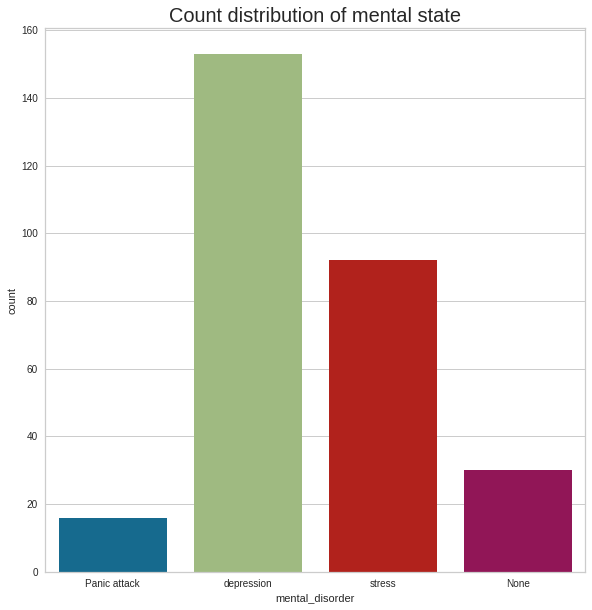

In [121]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="mental_disorder", data=df2)
plt.title("Count distribution of mental state", size=20)
#plt.subplot(122)
labels=[0,1]
#plt.pie(df2["mental_disorder"].value_counts().values,autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

In [133]:
#first lets try to resample "None"

In [134]:
target1=df2[df2['mental_disorder']=="None"]
target0=df2[df2['mental_disorder']=="depression"]

In [135]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [139]:
target2=df2[df2['mental_disorder']=="stress"]

In [140]:
target2 = resample(target2,replace=True,n_samples=len(target0),random_state=40)

In [146]:
target3 = df2[df2['mental_disorder']=="Panic attack"]

In [147]:
target3['mental_disorder'].value_counts()

Panic attack    16
Name: mental_disorder, dtype: int64

In [148]:
target3 = resample(target3,replace=True,n_samples=75,random_state=40)

In [149]:
target=pd.concat([target0,target1,target2,target3])

In [150]:
target['mental_disorder'].value_counts()

depression      153
None            153
stress          153
Panic attack     75
Name: mental_disorder, dtype: int64

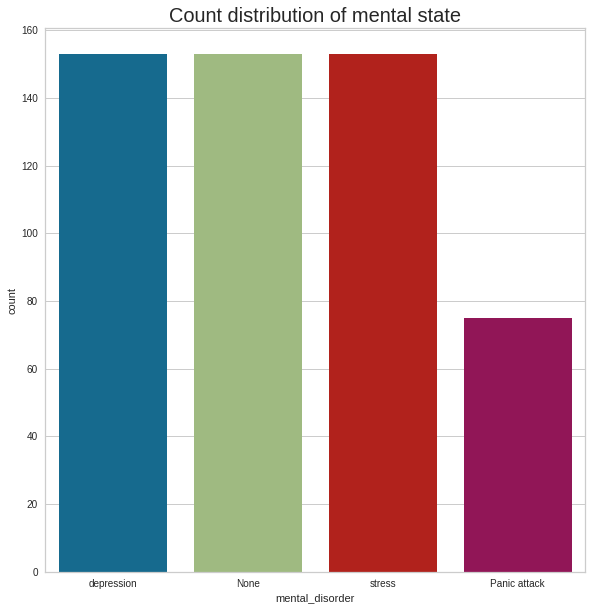

In [153]:
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="mental_disorder", data=target)
plt.title("Count distribution of mental state", size=20)
#plt.subplot(122)
labels=[0,1]
#plt.pie(df2["mental_disorder"].value_counts().values,autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

In [154]:
df3 = target.copy()

In [155]:
s3 = setup(df3, target = 'mental_disorder')

,Description,Value
0,session_id,1869
1,Target,mental_disorder
2,Target Type,Multiclass
3,Label Encoded,"None: 0, Panic attack: 1, depression: 2, stress: 3"
4,Original Data,"(534, 35)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,34
8,Ordinal Features,False
9,High Cardinality Features,False


In [156]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8547,0.9593,0.8675,0.8605,0.8509,0.8031,0.8075,0.1330
et,Extra Trees Classifier,0.8494,0.9626,0.8617,0.8574,0.8477,0.7953,0.7990,0.1080
catboost,CatBoost Classifier,0.8414,0.9632,0.8543,0.8480,0.8369,0.7848,0.7897,6.4890
gbc,Gradient Boosting Classifier,0.8413,0.9475,0.8549,0.8496,0.8374,0.7845,0.7895,0.2080
lr,Logistic Regression,0.8386,0.9172,0.8511,0.8436,0.8340,0.7815,0.7857,0.5780
lightgbm,Light Gradient Boosting Machine,0.8307,0.9485,0.8447,0.8362,0.8255,0.7700,0.7751,0.0580
svm,SVM - Linear Kernel,0.8227,0.0000,0.8364,0.8280,0.8182,0.7608,0.7650,0.0110
dt,Decision Tree Classifier,0.8090,0.8712,0.8286,0.8128,0.8030,0.7420,0.7471,0.0080
lda,Linear Discriminant Analysis,0.7878,0.9166,0.7965,0.7902,0.7777,0.7124,0.7191,0.0130
ridge,Ridge Classifier,0.7876,0.0000,0.8003,0.7981,0.7765,0.7121,0.7206,0.0070


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1869, verbose=0,
                       warm_start=False)

In [159]:
rf2 = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9932,0.9500,0.9549,0.9465,0.9283,0.9318
1,0.8684,0.9749,0.8875,0.8864,0.8694,0.8224,0.8278
2,0.9474,0.9950,0.9542,0.9474,0.9474,0.9286,0.9286
3,0.8378,0.9466,0.8625,0.8359,0.8338,0.7784,0.7808
4,0.8919,0.9650,0.9028,0.8917,0.8907,0.8519,0.8527
5,0.7027,0.9102,0.6944,0.6909,0.6904,0.5962,0.6004
6,0.8108,0.9456,0.8403,0.8149,0.8060,0.7451,0.7502
7,0.9730,0.9631,0.9722,0.9751,0.9727,0.9632,0.9642
8,0.8108,0.9677,0.8472,0.8587,0.8002,0.7481,0.7683


In [160]:
predict_model(rf2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8758,0.9787,0.8752,0.8739,0.8711,0.8229,0.8252


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_no,suicidal_thoughts_yes,therapy_yes,mental_disorder,Label,Score
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,stress,stress,0.94
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.73
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.95
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.73
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,stress,stress,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,depression,depression,0.54
157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None,None,0.98
158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.40
159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,None,None,0.89


In [166]:
rf2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1869, verbose=0,
                       warm_start=False)

In [161]:
tuned_rf2 = tune_model(rf2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.9752,0.7542,0.8156,0.7782,0.7105,0.7239
1,0.7895,0.9465,0.7958,0.7964,0.7830,0.7143,0.7204
2,0.8947,0.9880,0.9125,0.8956,0.8916,0.8582,0.8606
3,0.7568,0.9241,0.7917,0.7566,0.7464,0.6683,0.6764
4,0.8649,0.9438,0.8801,0.8705,0.8667,0.8152,0.8160
5,0.7568,0.8969,0.7431,0.7706,0.7537,0.6677,0.6724
6,0.7027,0.8919,0.7500,0.6822,0.6779,0.6025,0.6127
7,0.9730,0.9671,0.9722,0.9751,0.9727,0.9632,0.9642
8,0.6757,0.9154,0.7014,0.7031,0.6690,0.5634,0.5759


In [162]:
ensemble_rf2 = ensemble_model(rf2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.9923,0.9000,0.9110,0.8860,0.8566,0.8665
1,0.8421,0.9609,0.8417,0.8611,0.8457,0.7853,0.7898
2,0.9211,0.9940,0.9333,0.9224,0.9203,0.8935,0.8943
3,0.7568,0.9415,0.7958,0.7529,0.7448,0.6706,0.6773
4,0.8649,0.9634,0.8819,0.8698,0.8641,0.8154,0.8178
5,0.7568,0.9094,0.7431,0.7706,0.7537,0.6677,0.6724
6,0.8378,0.9395,0.8611,0.8467,0.8386,0.7811,0.7842
7,0.9730,0.9671,0.9722,0.9751,0.9727,0.9632,0.9642
8,0.7297,0.9376,0.7708,0.7561,0.7146,0.6397,0.6557


In [163]:
predict_model(ensemble_rf2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8696,0.9729,0.8743,0.8656,0.8660,0.8149,0.8160


,gender_Female,age_13-19,age_20-26,age_27-33,age_34-44,age_45 or more,education_College,education_Professional,education_School,education_Unemployed,...,thoughts_time_morning,thoughts_time_night,voices_no,harming_others_yes,suicide_no,suicidal_thoughts_yes,therapy_yes,mental_disorder,Label,Score
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,stress,stress,0.8030
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.6770
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.8360
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.5950
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,stress,stress,0.5780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,depression,depression,0.4780
157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,None,None,0.9200
158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,stress,stress,0.4240
159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,None,None,0.7110


In [167]:
final_rf = finalize_model(rf2)

In [168]:
df3.head()

,gender,age,education,marital,income,loan,friend_no,friend_help,friend_interact,share_feel,...,thoughts_command,self_harm,thoughts_acted,thoughts_acted2,thoughts_time,voices,harming_others,suicide,suicidal_thoughts,therapy
1,Male,20-26,University,married,<10,no,3+,yes,1,yes,...,yes,no,yes,yes,night,no,no,no,no,no
2,Female,13-19,College,single,<10,no,1,yes,1,no,...,yes,no,yes,yes,Afternoon,no,no,no,no,yes
3,Female,13-19,College,single,<10,no,1,no,0,maybe,...,maybe,yes,yes,yes,night,no,no,yes,no,no
5,Female,20-26,University,single,<10,no,3+,yes,3,yes,...,maybe,no,yes,no,Afternoon,yes,no,no,no,no
12,Male,20-26,University,single,<20,no,3+,yes,3+,maybe,...,maybe,no,yes,no,night,no,yes,no,no,no


In [175]:
data_unseen = df2.iloc[[1]]

In [178]:
data_unseen['mental_disorder']

1    depression
Name: mental_disorder, dtype: object

In [180]:
unseen_predictions = predict_model(final_rf, data=data_unseen)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0,0,0,0,0,0,0


In [182]:
unseen_predictions

,gender,age,education,marital,income,loan,friend_no,friend_help,friend_interact,share_feel,...,thoughts_acted,thoughts_acted2,thoughts_time,voices,harming_others,suicide,suicidal_thoughts,therapy,Label,Score
1,Male,20-26,University,married,<10,no,3+,yes,1,yes,...,yes,yes,night,no,no,no,no,no,depression,0.72


In [181]:
unseen_predictions["Label"]

1    depression
Name: Label, dtype: object

In [184]:
save_model(final_rf,'../artifacts/pycaretModels/finalRFmodel_20APR2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='mental_disorder',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
       

In [185]:
loaded_model = load_model('../artifacts/pycaretModels/finalRFmodel_20APR2022')

Transformation Pipeline and Model Successfully Loaded


In [187]:
df3.iloc[[100]]['mental_disorder']

153    depression
Name: mental_disorder, dtype: object

In [186]:
predict_model(loaded_model,data=df3.iloc[[100]])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0,0,0,0,0,0,0


,gender,age,education,marital,income,loan,friend_no,friend_help,friend_interact,share_feel,...,thoughts_acted,thoughts_acted2,thoughts_time,voices,harming_others,suicide,suicidal_thoughts,therapy,Label,Score
153,Male,20-26,University,single,<10,no,none,no,0,no,...,yes,yes,night,no,yes,yes,no,no,depression,1.0
